In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dfTemp = pd.read_csv('NOAA_IPCC_RCPtempsscenarios.csv')

In [5]:
dfTemp.head()

,Time,Historical NOAA temp. respect to 20th century,CNRM annual RCP8.5 temp. with respect to 20th century,Historical NOAA temp & CNRM RCP 8.5 with respect to 20th century,IPCC Year,max#5.795,min#1.373,a1fi#4.492,alb#2.947,alt#2.538,a2#3.794,b1#1.982,b2#2.687
0,1880,-0.16,-0.125997,-0.16,1880.0,-0.16,-0.16,-0.16,-0.16,-0.16,-0.16,-0.16,-0.16
1,1881,-0.10,-0.185231,-0.10,1885.0,-0.20,-0.20,-0.20,-0.20,-0.20,-0.20,-0.20,-0.20
2,1882,-0.12,0.016642,-0.12,1890.0,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30
3,1883,-0.17,-0.340016,-0.17,1895.0,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25
4,1884,-0.23,-0.856588,-0.23,1900.0,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11


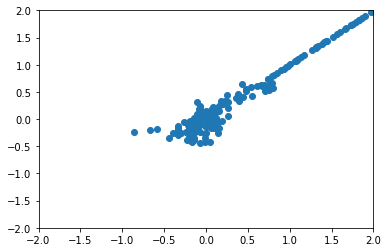

In [15]:
plt.scatter(dfTemp["CNRM annual RCP8.5 temp. with respect to 20th century"], dfTemp["Historical NOAA temp & CNRM RCP 8.5 with respect to 20th century"])
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

In [16]:
# 1880 to 2013 is historical
temperature_hist = dfTemp.loc[dfTemp["Time"] <= 2013, "Historical NOAA temp & CNRM RCP 8.5 with respect to 20th century"]
years_hist = dfTemp.loc[dfTemp["Time"] <= 2013, "Time"]

In [21]:
def gmsl_07(parameters, temperatures, deltat):
    alpha, Teq, S0 = parameters[0], parameters[1], parameters[2]
    sl_out = [0]*len(temperatures)
    
    sl_out[0] = S0
    for tt in range(len(temperatures)-1):
        sl_out[tt+1] = sl_out[tt] + deltat*alpha*(temperatures[tt]-Teq)
        
    return sl_out

In [23]:
model = gmsl_07(parameters=[3.4, -0.5, -24], temperatures=temperature_hist, deltat=1)
data

r = data-model

In [ ]:
# parameters:
[alpha, Teq, S0, rho, sigma]

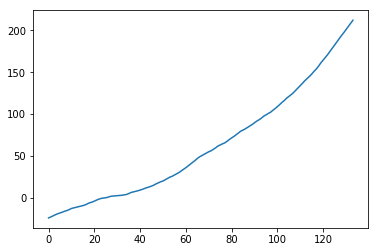

In [24]:
plt.plot(model)
plt.show()

In [ ]:
# just an illustration of the normalization of temperatures that we need to do
# could also be relative to 1961-1990, as in the AI notebook.
temperature_hist[0] - np.mean(temperature_hist[ between 1901, 2000])

In [44]:
dfSL = pd.read_csv('h762a.csv', header=None)
dfSL.head()

,0,1,2,3,4
0,1923,5,1,6,2530
1,1923,5,1,7,2560
2,1923,5,1,8,2591
3,1923,5,1,9,2621
4,1923,5,1,10,2652


In [45]:
dfSL.rename(columns={0:'year',1:'month', 2:'day', 3:'hour', 4: 'sl'}, inplace=True)
dfSL.head()

,year,month,day,hour,sl
0,1923,5,1,6,2530
1,1923,5,1,7,2560
2,1923,5,1,8,2591
3,1923,5,1,9,2621
4,1923,5,1,10,2652


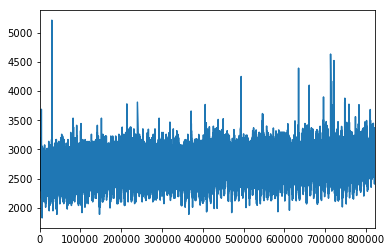

In [43]:
dfSL.loc[dfSL["sl"]>-5000,"sl"].plot()
plt.show()